# Evaluation of Advertising Campaign

In [4]:
import pandas as pd

control_url = 'https://raw.githubusercontent.com/CJTAYL/ab_testing/main/control_group.csv'
test_url = 'https://raw.githubusercontent.com/CJTAYL/ab_testing/main/test_group.csv'

control_group = pd.read_csv(control_url, sep=';')
test_group = pd.read_csv(test_url, sep=';')

In [5]:
control_group.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [6]:
test_group.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [7]:
column_names = ['group', 'date', 'total_spent', 'impressions', 'reach', 'clicks', 'searches', 'views', 'add_to_cart', 'purchase']

control_group.columns = column_names
test_group.columns = column_names

### Variable Definitions

- group: Group assignment
- date: Date data were collected
- total_spent: Total amount spent in dollars
- impressions: Number of impressions the ad crossed through the campaign
- reach: Number of unique impressions recieved
- clicks: Number of website clicks receieved through the ads
- searches: Number of users who performed searches on the website
- views:  Number of users who viewed content and products on the website
- add_to_cart: Number of users who added products to their cart
- purchase: Number of purchases

In [8]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   group        30 non-null     object 
 1   date         30 non-null     object 
 2   total_spent  30 non-null     int64  
 3   impressions  29 non-null     float64
 4   reach        29 non-null     float64
 5   clicks       29 non-null     float64
 6   searches     29 non-null     float64
 7   views        29 non-null     float64
 8   add_to_cart  29 non-null     float64
 9   purchase     29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [9]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   group        30 non-null     object
 1   date         30 non-null     object
 2   total_spent  30 non-null     int64 
 3   impressions  30 non-null     int64 
 4   reach        30 non-null     int64 
 5   clicks       30 non-null     int64 
 6   searches     30 non-null     int64 
 7   views        30 non-null     int64 
 8   add_to_cart  30 non-null     int64 
 9   purchase     30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [10]:
control_group.head()

,group,date,total_spent,impressions,reach,clicks,searches,views,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_group.head()

,group,date,total_spent,impressions,reach,clicks,searches,views,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [12]:
# Shorten group labels
control_group['group'] = control_group['group'].replace({'Control Campaign' : 'control'})
test_group['group'] = test_group['group'].replace({'Test Campaign' : 'test'})

In [13]:
# Update data types for date variable

from datetime import datetime

date_string = '1.08.2019'
date_format = '%d.%m.%Y'

control_group['date'] = datetime.strptime(date_string, date_format)
test_group['date'] = datetime.strptime(date_string, date_format)

In [14]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   group        30 non-null     object        
 1   date         30 non-null     datetime64[ns]
 2   total_spent  30 non-null     int64         
 3   impressions  29 non-null     float64       
 4   reach        29 non-null     float64       
 5   clicks       29 non-null     float64       
 6   searches     29 non-null     float64       
 7   views        29 non-null     float64       
 8   add_to_cart  29 non-null     float64       
 9   purchase     29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [15]:
control_group.isnull().sum()

group          0
date           0
total_spent    0
impressions    1
reach          1
clicks         1
searches       1
views          1
add_to_cart    1
purchase       1
dtype: int64

In [16]:
test_group.isnull().sum()

group          0
date           0
total_spent    0
impressions    0
reach          0
clicks         0
searches       0
views          0
add_to_cart    0
purchase       0
dtype: int64

In [17]:
# Fill missing values with column median
control_group.fillna(control_group.median(numeric_only=True), inplace=True)

In [18]:
# Update numeric columns to int64

numeric_cols = control_group.select_dtypes(include=['number']).columns

control_group[numeric_cols] = control_group[numeric_cols].astype('int64')
test_group[numeric_cols] = test_group[numeric_cols].astype('int64')

In [19]:
# Create combined dataset for visualizations
combined_data = pd.concat([control_group, test_group], ignore_index=True)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_pointplot(y, y_label):
    plt.figure(figsize=(8, 6))
    sns.pointplot(x='group', y=y, hue='group', data=combined_data)
    plt.ylabel(y_label)
    plt.xlabel('Group')
    plt.show()

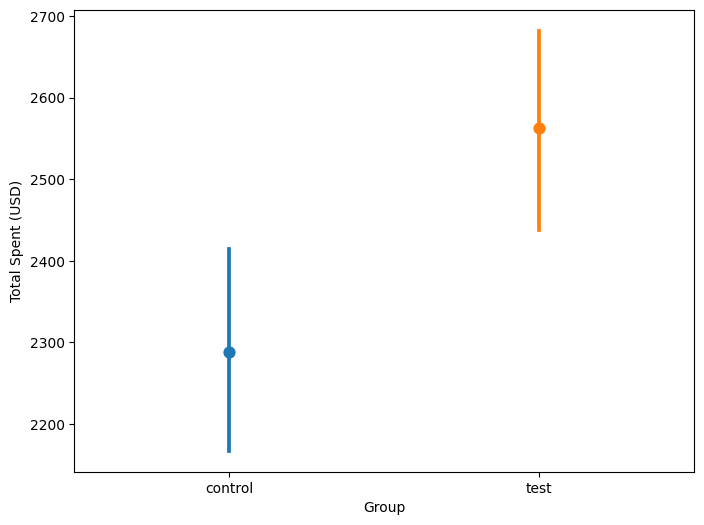

In [21]:
generate_pointplot('total_spent', 'Total Spent (USD)')

There is a difference between the means; however, without a statistical test it is unclear if the difference is statistically significant.

## Checking Assumptions of Independent T-Test

Assumptions of Independent T-Test
- independence of observations (addressed in experimental design)
- no significant outliers
- dependent variable for each group is approximately normally distributed
- equal variance across the two groups
- samples are drawn from the population at random (addressed in experimental design)
- dependent variable is measured on an interval or ratio scale (addressed in experimental design)

### Presence of Significant Outliers

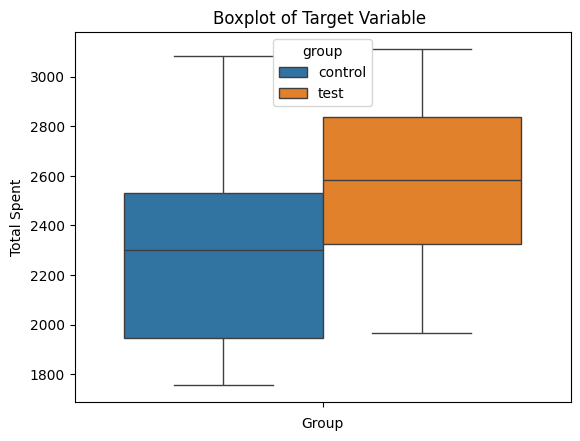

In [22]:
sns.boxplot(combined_data,
            y = 'total_spent',
            hue = 'group')

plt.title('Boxplot of Target Variable ')
plt.ylabel('Total Spent')
plt.xlabel('Group')
plt.show()

Based on the boxplot, there does not appear to be any significant outliers in the dataset.

### Normality of Dependent Variable Across Groups

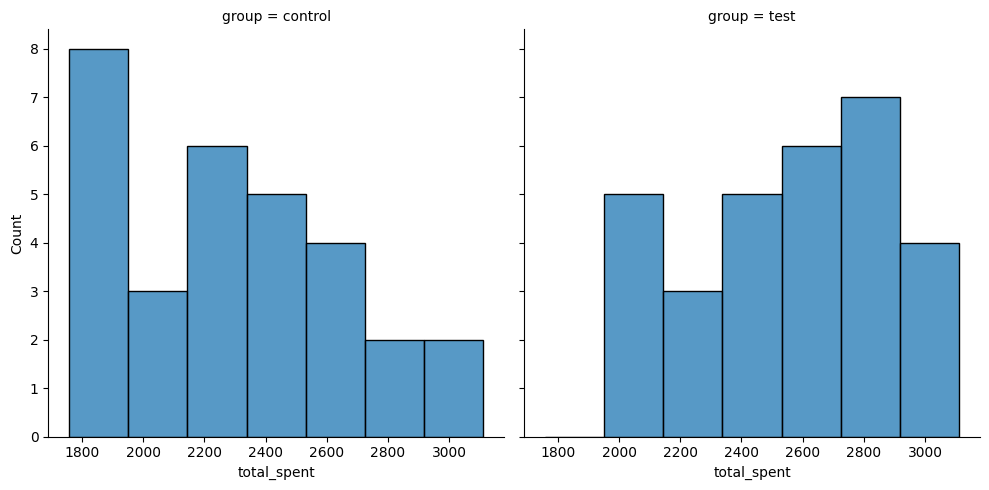

In [23]:
sns.displot(
    combined_data,
    x='total_spent',
    col='group'
)

plt.show()

The Wilks-Shapiro test is used to determine if data fits a normal distribution. It is especially effective for small and medium datasets.

$H_0$: The sample data are drawn from a normal distribution

$H_1$: The sample data are not drawn from a normal distribution

In [25]:
from scipy.stats import shapiro

con_stat, con_p_value = shapiro(control_group['total_spent'])
test_stat, test_p_value = shapiro(test_group['total_spent'])

sig_level = 0.05

print(f'Control Group P-Value: {con_p_value}')

if con_p_value < sig_level:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

print()

print(f'Test Group P-Value: {test_p_value}')

if test_p_value < sig_level:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')


Control Group P-Value: 0.23127490282058716
Fail to reject null hypothesis

Test Group P-Value: 0.11714765429496765
Fail to reject null hypothesis


Based on the results of the Wilks-Shapiro test, the distribution of the data are likely normal.

### Equal Variance Across Groups

Based on the data in the boxplot, it appears the variance across groups is similar. To provide additional infomation about group variance, Bartlett's Test was also conducted. Its null and alternative hypotheses are:

$H_0$: The variances are equal across groups

$H_1$: The variances are not equal across groups

In [26]:
from scipy.stats import bartlett

stat, p_value = bartlett(test_group['total_spent'], control_group['total_spent'])

print(f'P-Value: {p_value}')

if p_value < sig_level:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

P-Value: 0.7809389394964033
Fail to reject null hypothesis


Based on the available data, it appears the assumptions of the independent t-test are met.

## Independent T Test

In [29]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(test_group['total_spent'], control_group['total_spent'])

print(f'Test Statistic: {t_stat}')
print(f'P-Value: {p_value}')

if p_value < sig_level:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Test Statistic: 2.969991516565667
P-Value: 0.004326251207113236
Reject null hypothesis


#### 95% Confidence Interval for Group Mean Difference

In [42]:
import numpy as np
import scipy.stats as stats

ctrl_grp = control_group['total_spent']
test_grp = test_group['total_spent']

mean_diff = test_grp.mean() - ctrl_grp.mean()
sem = np.sqrt(stats.sem(test_grp)**2 + stats.sem(ctrl_grp)**2)
confidence_level = 1 - sig_level
df = len(test_grp) + len(ctrl_grp) - 2

confidence_interval = stats.t.interval(confidence_level, df, loc=mean_diff, scale=sem)

print(f'Mean Difference: {mean_diff}')
print(f'95% Confidence Interval: {confidence_interval}')


Mean Difference: 274.6333333333332
95% Confidence Interval: (89.53571885027657, 459.73094781638986)


### Post-Hoc Determination of Statisitcal Power

In [43]:
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

In [44]:
# Using Cohen's d to calculate the effect size

cohen_d(test_grp, ctrl_grp)

0.7668485121357427

In [46]:
from statsmodels.stats.power import TTestIndPower

effect_size = 0.77
alpha = 0.05
nobs = 30
power = None

analysis = TTestIndPower()
result = analysis.solve_power(effect_size = effect_size, power=power, nobs1=nobs, ratio=1.0, alpha=alpha)
print(f'Power: {result}')

Power: 0.8346025673912121
